# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2015, 2018, 2021 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2015, 2018, 2021 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich czterech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2015 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach 2015, 2018, 2021 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2015, 2018, 2021, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



# Zad 1

In [1]:
from configs import *
from read_process import *
from calculations import *
from visualizations import *

In [2]:
dfs = {}
years = YEARS
for year in years:
    dataframe = download_gios_archive(year, GIOS_URL_IDS[year], GIOS_PM25_FILES[year])
    print(f"Processing for {year}")
    dfs[year] = process_raw_df(dataframe, year)
metadata = download_metadata(META_ID)

Processing for 2015


/home/ejhuus/Studia/ZTP/projekt3/read_process.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Measurment'] = pd.to_datetime(df[time_col], errors='coerce')


Processing for 2018


/home/ejhuus/Studia/ZTP/projekt3/read_process.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Measurment'] = pd.to_datetime(df[time_col], errors='coerce')


Processing for 2021


/home/ejhuus/Studia/ZTP/projekt3/read_process.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Measurment'] = pd.to_datetime(df[time_col], errors='coerce')


Processing for 2024


/home/ejhuus/Studia/ZTP/projekt3/read_process.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Measurment'] = pd.to_datetime(df[time_col], errors='coerce')


In [4]:
filtered_metadata = process_metadata(metadata)
#bierzemy pod uwage te wiersze gdzie zaszła zmiana kodów
metadata_subset = filtered_metadata.dropna(subset=[OLD_STATION_NAME, NEW_STATION_NAME])
raw_mapper = dict(zip(metadata_subset[OLD_STATION_NAME],metadata_subset[NEW_STATION_NAME]))
code_mapper = atomize_dict(raw_mapper)

In [5]:
for year, df in dfs.items():
    dfs[year] = update_codes(df, code_mapper)

In [6]:
final_df = merge_years(dfs, metadata)

In [6]:
final_df.to_csv("merged_DF.csv")

In [7]:
final_df

City                    Jelenia Góra      Wrocław                 Bydgoszcz  \
Station_Code            DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna   
Measurment                                                                    
2015-01-01 01:00:00.000      151.112         78.0      50.0000         29.2   
2015-01-01 02:00:00.000      262.566         42.0      33.8244         27.1   
2015-01-01 03:00:00.005      222.830         27.0      28.7215          7.9   
2015-01-01 04:00:00.010      210.767         24.0      20.6891          7.1   
2015-01-01 05:00:00.015      191.211         22.0      22.5335          9.2   
...                              ...          ...          ...          ...   
2024-12-31 19:00:00.000       21.700        102.6      38.1000          6.9   
2024-12-31 20:00:00.000       48.300         51.4      27.7000          5.4   
2024-12-31 21:00:00.000       67.000         65.5      19.9000          7.7   
2024-12-31 22:00:00.000       72.700         30.2      17.4000         14.5   
2024-12-31 23:00:00.000       79.900         36.0      23.6000         14.5   

City                                       Lublin         Łódź       Zgierz  \
Station_Code            KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
Measurment                                                                    
2015-01-01 01:00:00.000         95.5      71.1012        59.73    58.690689   
2015-01-01 02:00:00.000         86.1      95.2582       185.92    44.501255   
2015-01-01 03:00:00.005         23.8      49.5078        54.25    24.163937   
2015-01-01 04:00:00.010         15.9      60.8468        50.15    19.516039   
2015-01-01 05:00:00.015         15.0      49.3106        39.17    16.850332   
...                              ...          ...          ...          ...   
2024-12-31 19:00:00.000         27.0      31.3000        31.00    44.900000   
2024-12-31 20:00:00.000         34.1      26.3000        33.30    49.500000   
2024-12-31 21:00:00.000         34.6      27.5000        34.00    48.700000   
2024-12-31 22:00:00.000         29.3      26.9000        31.70    48.100000   
2024-12-31 23:00:00.000         16.0      23.5000        26.80    38.400000   

City                    Zielona Góra       Kraków  ...    Białystok  \
Station_Code            LuZielKrotka MpKrakAlKras  ... PdBialUpalna   
Measurment                                         ...                
2015-01-01 01:00:00.000          NaN         73.0  ...         67.0   
2015-01-01 02:00:00.000      51.8628         55.0  ...        103.0   
2015-01-01 03:00:00.005      15.8660         61.0  ...         49.0   
2015-01-01 04:00:00.010      20.1187         62.0  ...         37.0   
2015-01-01 05:00:00.015      27.3413         57.0  ...         27.0   
...                              ...          ...  ...          ...   
2024-12-31 19:00:00.000      14.5000         55.1  ...         18.0   
2024-12-31 20:00:00.000      15.9000         57.0  ...         10.0   
2024-12-31 21:00:00.000      16.1000         58.7  ...         18.0   
2024-12-31 22:00:00.000      15.9000         67.9  ...         15.0   
2024-12-31 23:00:00.000      12.5000         75.3  ...         13.0   

City                        Przemyśl       Gdańsk  Kościerzyna     Katowice  \
Station_Code            PkPrzemGrunw PmGdaLeczkow PmKosTargowa SlKatoKossut   
Measurment                                                                    
2015-01-01 01:00:00.000      18.9027          NaN          NaN       51.389   
2015-01-01 02:00:00.000      15.9257     75.52780          NaN       37.709   
2015-01-01 03:00:00.005      16.1709      8.87389          NaN       41.984   
2015-01-01 04:00:00.010      16.0252      8.83194    22.789500       45.404   
2015-01-01 05:00:00.015      15.5498      6.56750    21.092125       36.854   
...                              ...          ...          ...          ...   
2024-12-31 19:00:00.000      17.6000     11.10000     9.000000       25.800   
2

# Zad 2
## Średnie miesięczne + trend dla miast
Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2015 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [9]:
monthly_cities = group_monthly_cities(final_df)
monthly_cities.head()

City                   Białystok  Bydgoszcz     Gdańsk  Jelenia Góra  \
Measurment Measurment                                                  
2015       1           22.421938  25.332167  15.310290     26.092398   
           2           40.255952  46.715164  21.431016     41.771110   
           3           30.956317  28.715162  17.494755     28.600913   
           4           13.361111  18.129707  10.505666     11.895732   
           5           10.413977  12.982953   8.403376      8.093733   

City                      Kalisz   Katowice  Kościerzyna     Kraków  \
Measurment Measurment                                                 
2015       1           30.194623  30.932681    36.901370  41.553164   
           2           48.822975  56.135774    47.714890  66.837065   
           3           37.407209  39.466406    38.406111  50.300004   
           4           20.317947  23.540604    21.909223  27.704372   
           5           19.549863  17.996449    13.273693  22.213582   

City                   Kędzierzyn-Koźle  Legionowo  ...      Radom    Siedlce  \
Measurment Measurment                               ...                         
2015       1                  31.290601  33.487752  ...  37.357841  23.887958   
           2                  53.037672  61.852679  ...  60.799266  44.441037   
           3                  38.139914  56.029032  ...  40.550494  36.093555   
           4                  20.908910  23.214722  ...  20.450965  14.482860   
           5                  15.339657  19.364636  ...  15.435304  14.957196   

City                    Szczecin   Warszawa    Wrocław     Zgierz  \
Measurment Measurment                                               
2015       1           18.813956  24.917226  31.919640  26.475356   
           2           31.918812  43.459365  44.043704  44.347470   
           3           25.415686  34.128170  34.341790  35.235215   
           4           13.878272  17.081654  17.274869  16.080556   
           5            9.896753  16.169848  15.871011  10.037634   

City                   Zielona Góra  Złoty Potok       Łódź   Żyrardów  
Measurment Measurment                                                   
2015       1              24.864497    20.538812  27.223338  40.874947  
           2              35.717292    36.606884  41.152630  65.455417  
           3              32.348464    24.132065  30.433775  50.802814  
           4              15.526083    13.769159  15.263889  21.455759  
           5              13.674646    11.364963  12.317204  18.701176  

[5 rows x 25 columns]

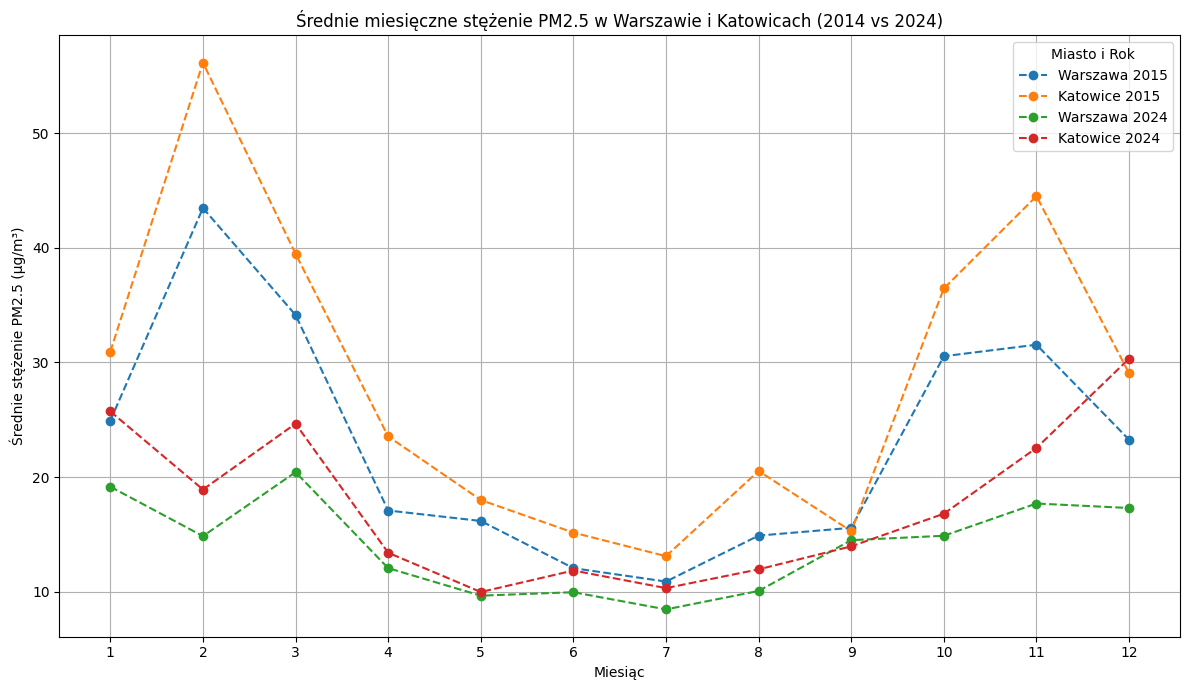

In [10]:
plot_city_trends(monthly_cities, EX2_YEARS, EX2_CITIES)

## Interpretacja zadania 2-ego
Po pierwsze możemy zauważyć, że w niektórych miesiącach poziomy zanieczyszczeń są o wiele większe niż innych np. w okresach zimowych średnie stężenie PM2.5 (najwyższy odczyt w lutym) jest zauważalnie większe niż w okresie letnim. To oczywiście spowodowane jest paleniem min. w piecach w gospodarstwach domowych.
Co ciekawsze w latach 2015 ogólny średni poziom zanieczysczeń jest większy niż w latach 2024 (linie trendu są wyżej), możemy, więc zauważyć efekty przepisów mających na celu ochronę środowiska, a także wymianę min. starych pieców grzewczych na nowe.
Ostatnią sprawą może być to, że średni poziom PM2.5 jest mniejszy w Warszawie niżeli w Katowicach (być może spowodowane tym, że na Śląsku w gospodarstwach domowych więcej było pieców węglowych).


# Zad 3
## Heatmapa miesięcznych średnich
Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach 2015, 2018, 2021 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

In [11]:
df_stacked = final_df.stack(level=['City', 'Station_Code'])
df_stacked.name = 'PM25_Value'
city_monthly_avg = group_cities_yearly_and_monthly(df_stacked)
#Średnie miesięczne dla miast.
display(city_monthly_avg)

/home/ejhuus/Studia/ZTP/projekt3/calculations.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = final_df.stack(level=['City', 'Station_Code'])


,City,Year,Month,PM25_Value
0,Białystok,2015,1,22.421938
1,Białystok,2015,2,40.255952
2,Białystok,2015,3,30.956317
3,Białystok,2015,4,13.361111
4,Białystok,2015,5,10.413977
...,...,...,...,...
1194,Żyrardów,2024,8,9.502823
1195,Żyrardów,2024,9,14.392222
1196,Żyrardów,2024,10,16.529569
1197,Żyrardów,2024,11,19.592569


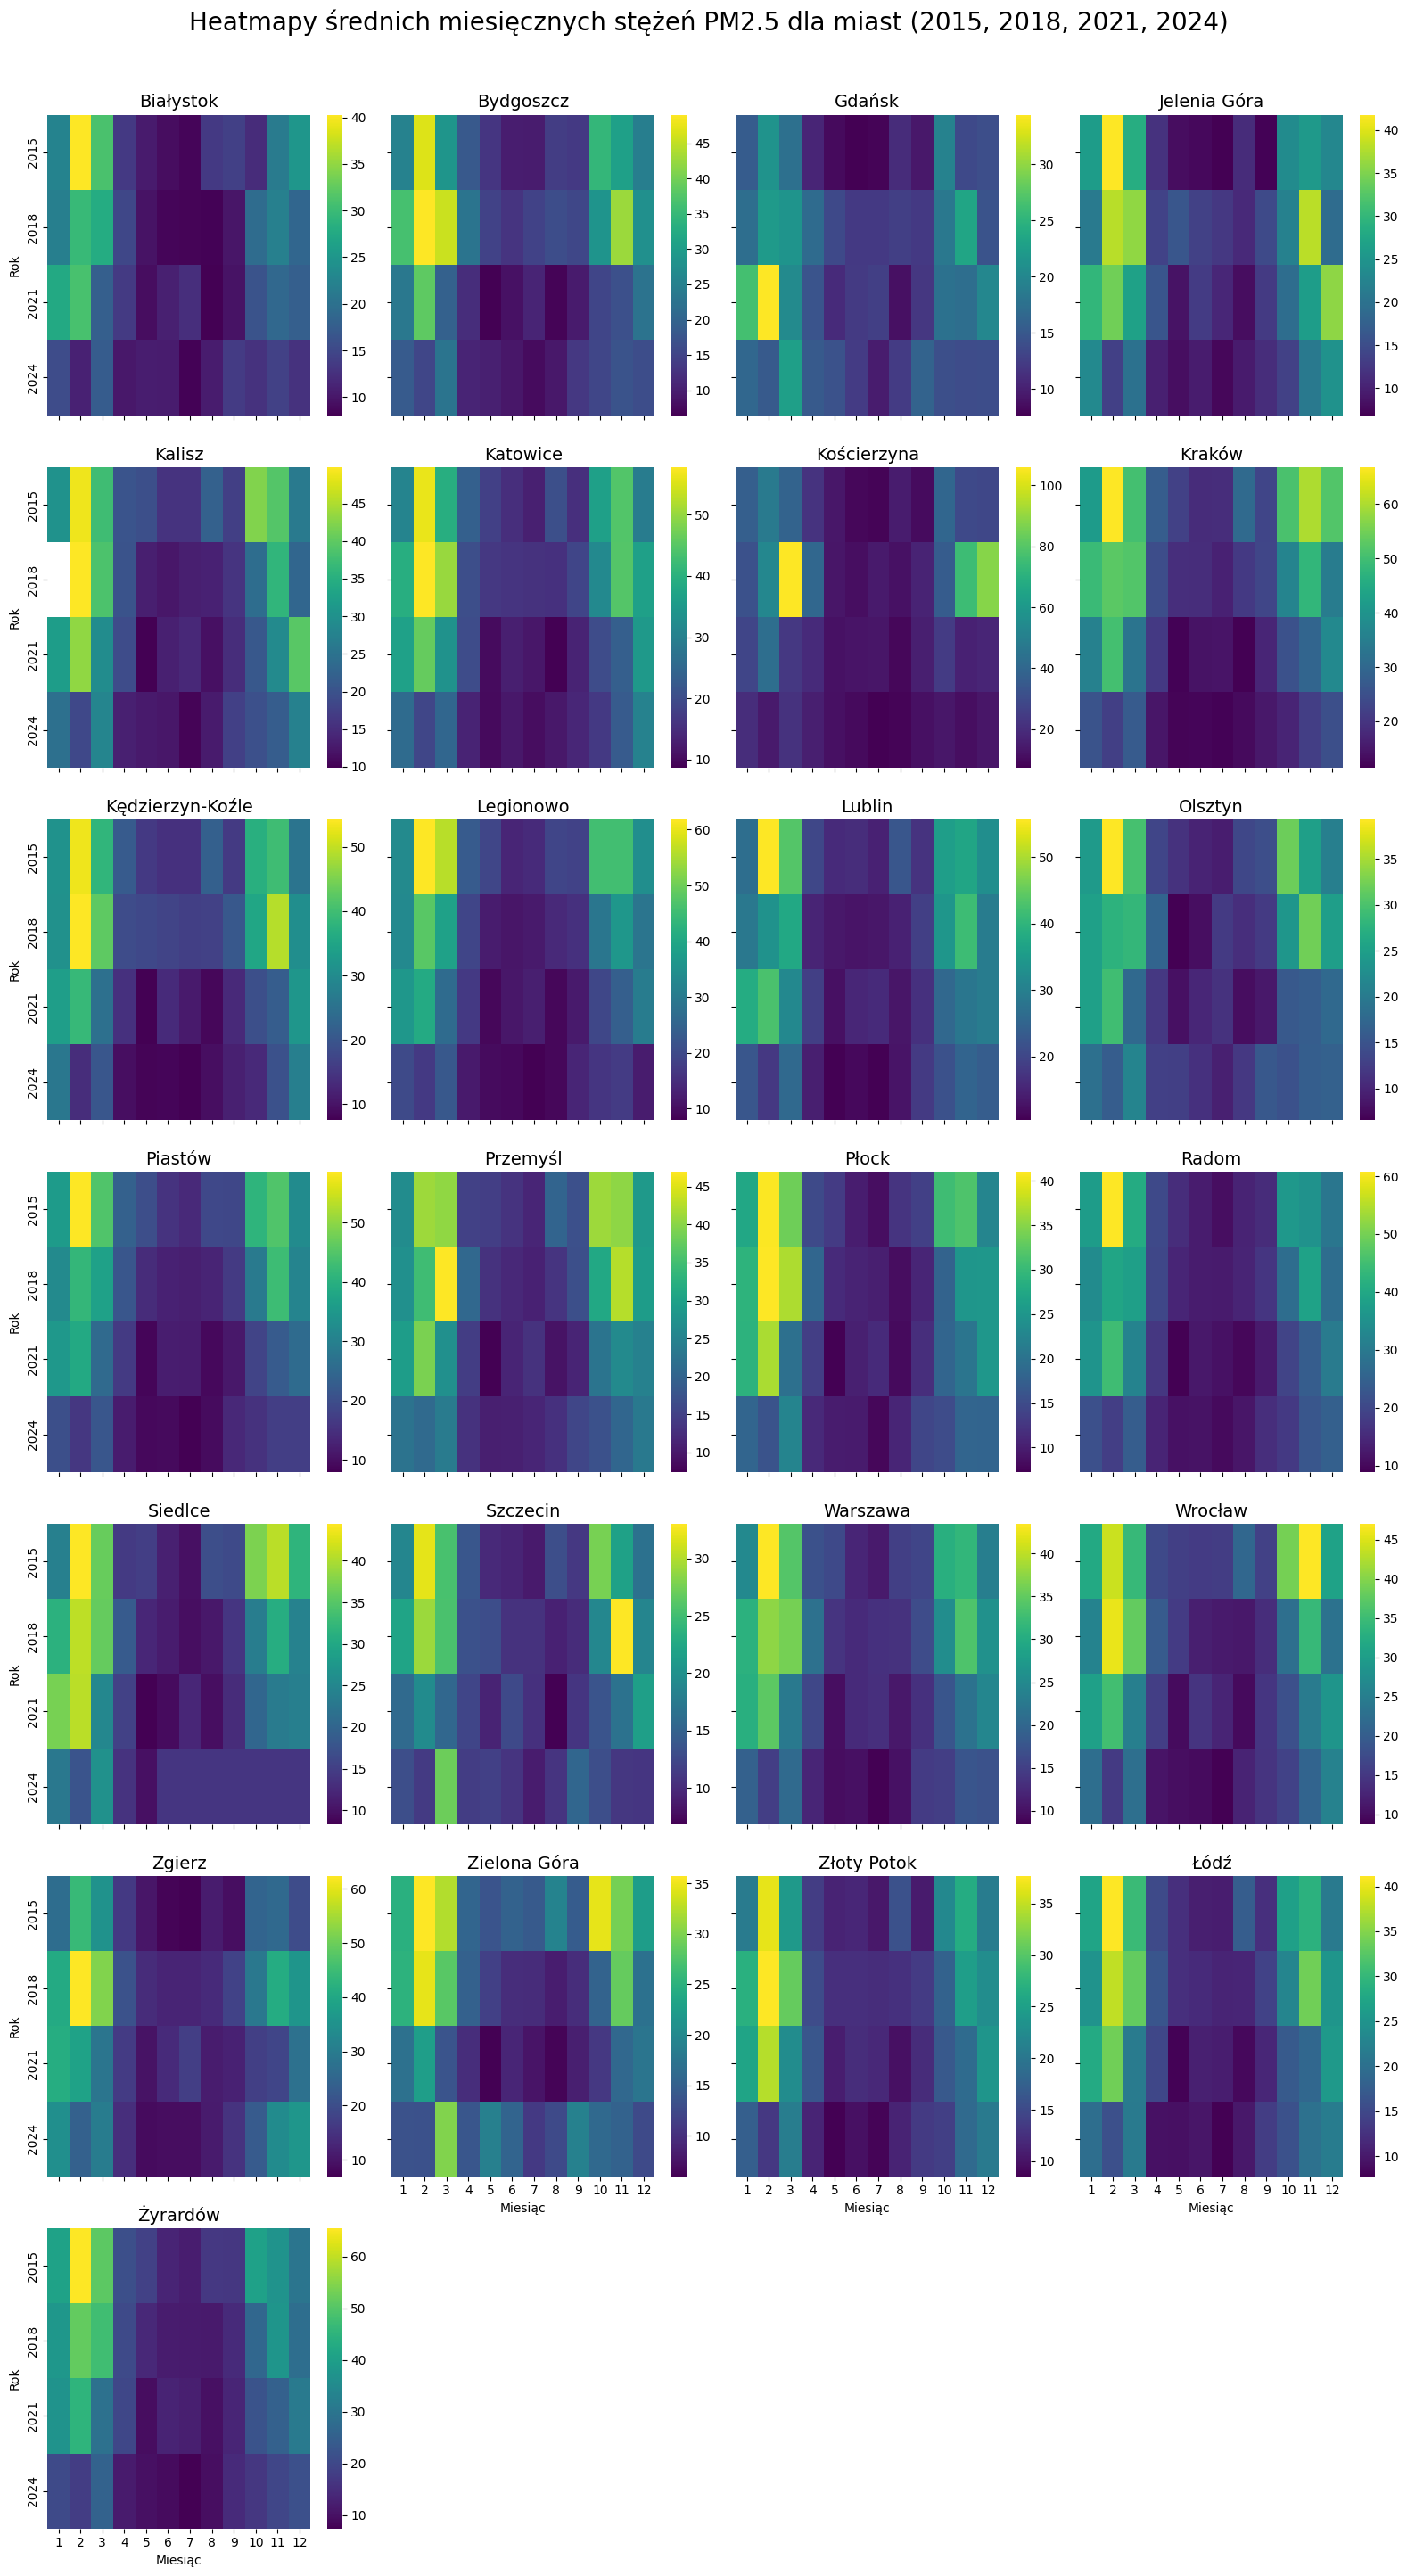

In [12]:
plot_city_heatmap(city_monthly_avg, YEARS)

## Interpretacja zadania 3-ego

Z tego wykresu jasno widać, że ogólna sytuacja z zanieczyszceniem PM2.5 ulega poprawieniu - widać to min. w Warszawie, Katowicach czy Szczecinie. Można zaobserwować również podobne trendy do tych wyłaniających się z poprzedniego zadania. Dla większości miast stężenia cząstek PM2.5 są najwyższe od września do kwietnia. Zmniejszają się one również w kolejnych rozpatrywanych latach (2015, 2018, 2021, 2024). Gdańsk utrzymuje bardzo niskie stężenia na przestrzeni zarówno sezonów jak i lat. Może to wynikać np z łagodniejszych zim. W Kaliszu brakuje danych dla stycznie 2018. Kościerzyna w marcu 2018 zanotowała najwyższe stężenie cząstek PM2.5 w miesiącu dla przedstawionych danych.

# Zad 4
## Dni z przekroczeniem normy (WHO)
Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2015, 2018, 2021, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [8]:
daily_means_df = final_df.resample('D').mean()
exceeding_df = create_norm_exceeding_df(daily_means_df, YEARS, WHO_NORM)
print("Liczba dni z przekroczeniem normy:")
display(exceeding_df.head())

City         Jelenia Góra      Wrocław                 Bydgoszcz               \
Station_Code DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna KpBydWarszaw   
Measurment                                                                      
2015                  146          319          209          189          214   
2018                  198          232          195          237          242   
2021                  162          213          157          129          119   
2024                  108          134          130          106          124   

City               Lublin         Łódź       Zgierz Zielona Góra       Kraków  \
Station_Code LbLubObywate LdLodzCzerni LdZgieMielcz LuZielKrotka MpKrakAlKras   
Measurment                                                                      
2015                  277          206          175          228          348   
2018                  234          203          248          158          344   
2021                  246          175          196           92          250   
2024                  170          128          193          144          180   

City          ...    Białystok     Przemyśl       Gdańsk  Kościerzyna  \
Station_Code  ... PdBialUpalna PkPrzemGrunw PmGdaLeczkow PmKosTargowa   
Measurment    ...                                                       
2015          ...          156          236          100          207   
2018          ...          149          225          150          239   
2021          ...          139          181          139          170   
2024          ...           75          146          140          102   

City             Katowice  Złoty Potok      Olsztyn       Kalisz     Szczecin  \
Station_Code SlKatoKossut SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze   
Measurment                                                                      
2015                  266          174          182          275          120   
2018                  284          195          189          199          115   
2021                  213          180          130          212           95   
2024                  164          117          140          163           72   

City                       
Station_Code ZpSzczPilsud  
Measurment                 
2015                  175  
2018                  194  
2021                  117  
2024                  130  

[4 rows x 30 columns]

Liczba dni z przekroczeniem normy:


Measurment,City,Station_Code,2015,2018,2021,2024
0,Jelenia Góra,DsJelGorOgin,146,198,162,108
1,Wrocław,DsWrocAlWisn,319,232,213,134
2,Wrocław,DsWrocWybCon,209,195,157,130
3,Bydgoszcz,KpBydPlPozna,189,237,129,106
4,Bydgoszcz,KpBydWarszaw,214,242,119,124


In [9]:
# Wybieramy 3 stacje z najmniejszą i 3 z największą liczbą dni z przekroczeniem w 2024
exceeding_YEAR = exceeding_df.sort_values(by=EX4_YEAR)
# 3 stacje z najmniejszą liczbą dni
bottom_3_stations = exceeding_YEAR.head(3)
# 3 stacje z największą liczbą dni
top_3_stations = exceeding_YEAR.tail(3)

selected_stations = pd.concat([bottom_3_stations, top_3_stations])
selected_station_codes = selected_stations['Station_Code'].tolist()

print("3 stacje z najmniejszą liczbą dni z przekroczeniem normy w 2024:")
display(bottom_3_stations)
print("\n3 stacje z największą liczbą dni z przekroczeniem normy w 2024:")
display(top_3_stations)

3 stacje z najmniejszą liczbą dni z przekroczeniem normy w 2024:


Measurment,City,Station_Code,2015,2018,2021,2024
28,Szczecin,ZpSzczAndrze,120,115,95,72
20,Białystok,PdBialUpalna,156,149,139,75
15,Siedlce,MzSiedKonars,236,208,177,79



3 stacje z największą liczbą dni z przekroczeniem normy w 2024:


Measurment,City,Station_Code,2015,2018,2021,2024
5,Lublin,LbLubObywate,277,234,246,170
9,Kraków,MpKrakAlKras,348,344,250,180
7,Zgierz,LdZgieMielcz,175,248,196,193


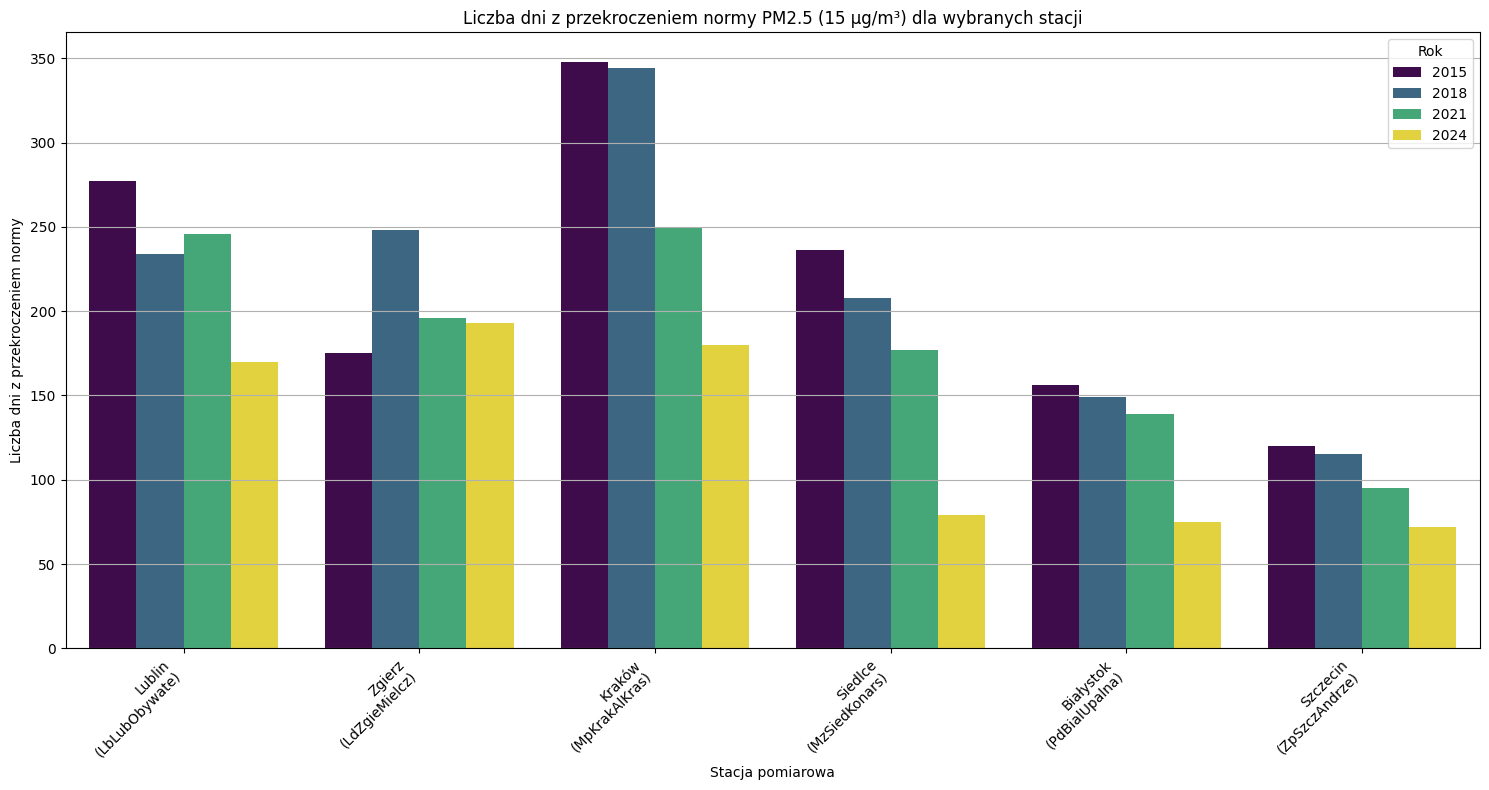

In [12]:
plot_data = exceeding_df[exceeding_df['Station_Code'].isin(selected_station_codes)]
plot_data_long = create_long_format(plot_data, YEARS)
plot_who_norm_barplot(plot_data_long)

## Interpretacja zadania 4-ego 

W pięciu z sześciu przedstawionych miast sytuacja uległa poprawie. Przerażające wydaje się, że do 2018 w Krakowie praktycznie każdego dnia były przekraczane normy (niedużo poniżej 350 dni w roku). Natomiast w 2024 sytuacji była już prawie dwukrotnie lepsza. We wszystkich latach Szczecin wydaje się być miastem w którym jakość powietrze znajduje się w ścisłej czołówce.